In [1]:
import pandas as pd
import numpy as np
from ngboost import NGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")
df.drop(df.columns[0], axis=1, inplace=True)

X = df.drop(columns=['2022'])
y = df['2022']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model_ngb = NGBRegressor(n_estimators=2000)
model_ngb.fit(X_train, y_train)

predictions_ngb = model_ngb.predict(X_test)

mae_ngb = mean_absolute_error(y_test, predictions_ngb)
print("Mean Absolute Error for NGBoost model:", mae_ngb)

features_2022 = df[df.columns.difference(['2022'])].tail(366)
forecast_2022_ngb = model_ngb.predict(features_2022)
print(forecast_2022_ngb)

[iter 0] loss=14.9593 val_loss=0.0000 scale=1.0000 norm=516701.9380
[iter 100] loss=14.7514 val_loss=0.0000 scale=1.0000 norm=484256.4013
[iter 200] loss=14.6504 val_loss=0.0000 scale=1.0000 norm=462765.2819
[iter 300] loss=14.5662 val_loss=0.0000 scale=1.0000 norm=445574.7043
[iter 400] loss=14.5021 val_loss=0.0000 scale=1.0000 norm=429210.0975
[iter 500] loss=14.4354 val_loss=0.0000 scale=1.0000 norm=411362.6479
[iter 600] loss=14.3745 val_loss=0.0000 scale=1.0000 norm=394425.1688
[iter 700] loss=14.3112 val_loss=0.0000 scale=1.0000 norm=379126.0386
[iter 800] loss=14.2424 val_loss=0.0000 scale=2.0000 norm=726818.4130
[iter 900] loss=14.1891 val_loss=0.0000 scale=1.0000 norm=350151.8134
[iter 1000] loss=14.1467 val_loss=0.0000 scale=1.0000 norm=339973.3597
[iter 1100] loss=14.1142 val_loss=0.0000 scale=1.0000 norm=331193.6926
[iter 1200] loss=14.0699 val_loss=0.0000 scale=0.5000 norm=160456.2928
[iter 1300] loss=14.0306 val_loss=0.0000 scale=0.5000 norm=155642.4947
[iter 1400] loss=1

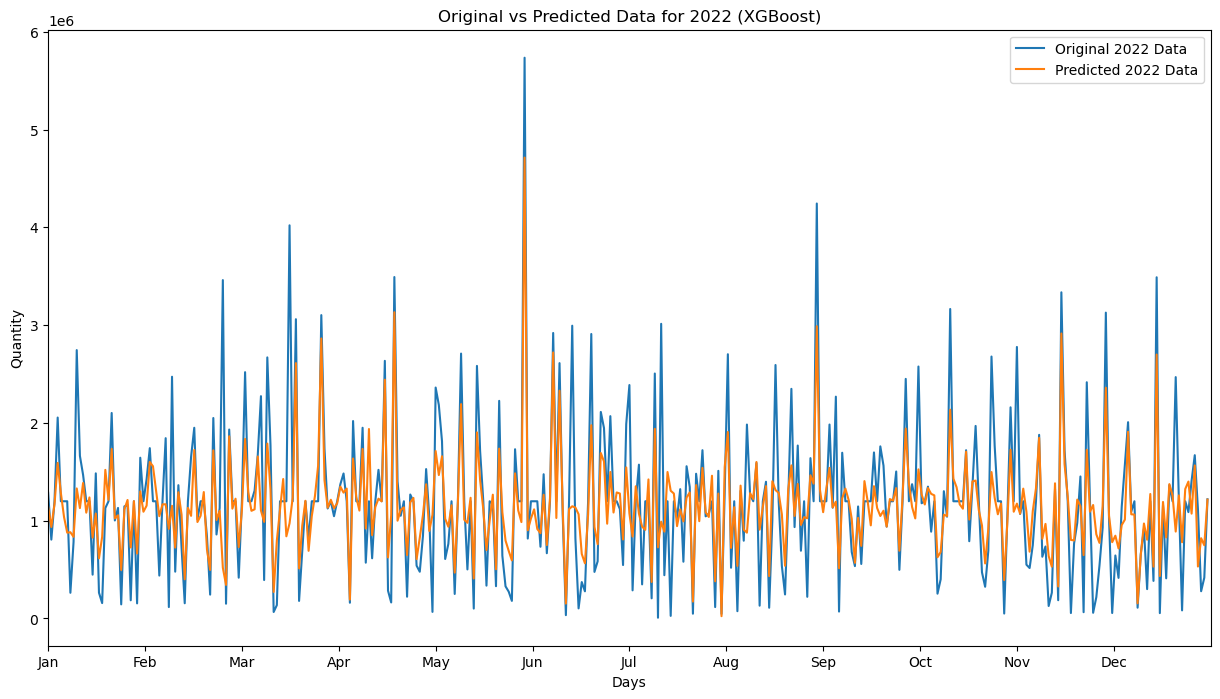

In [2]:
import matplotlib.pyplot as plt
original_data_2022 = df['2022'].tail(366).values
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = np.arange(0, 366, 30.5)
days = range(366)
plt.figure(figsize=(15, 8))
plt.plot(original_data_2022, label='Original 2022 Data')
plt.plot(forecast_2022_ngb, label='Predicted 2022 Data')
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Original vs Predicted Data for 2022 (XGBoost)')
plt.xticks(month_ticks, months)
plt.xlim(0, 366)
plt.legend()
plt.show()